# Ordinary Differential Equations Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Lorenz system

The [Lorenz system](http://en.wikipedia.org/wiki/Lorenz_system) is one of the earliest studied examples of a system of differential equations that exhibits chaotic behavior, such as bifurcations, attractors, and sensitive dependence on initial conditions. The differential equations read:

$$ \frac{dx}{dt} = \sigma(y-x) $$
$$ \frac{dy}{dt} = x(\rho-z) - y $$
$$ \frac{dz}{dt} = xy - \beta z $$

The solution vector is $[x(t),y(t),z(t)]$ and $\sigma$, $\rho$, and $\beta$ are parameters that govern the behavior of the solutions.

Write a function `lorenz_derivs` that works with `scipy.integrate.odeint` and computes the derivatives for this system.

In [30]:
def lorentz_derivs(yvec, t, sigma, rho, beta):
    if(type(rho) == "NoneType"): print("err")
    return [sigma * (yvec[1] - yvec[0]), yvec[0] * (rho - yvec[2]) - yvec[1], yvec[0]*yvec[1] - beta*yvec[2]]

In [31]:
assert np.allclose(lorentz_derivs((1,1,1),0, 1.0, 1.0, 2.0),[0.0,-1.0,-1.0])

Write a function `solve_lorenz` that solves the Lorenz system above for a particular initial condition $[x(0),y(0),z(0)]$. Your function should return a tuple of the solution array and time array.

In [95]:
def solve_lorentz(ic, max_time=4.0, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """Solve the Lorenz system for a single initial condition.
    
    Parameters
    ----------
    ic : array, list, tuple
        Initial conditions [x,y,z].
    max_time: float
        The max time to use. Integrate with 250 points per time unit.
    sigma, rho, beta: float
        Parameters of the differential equation.
        
    Returns
    -------
    soln : np.ndarray
        The array of the solution. Each row will be the solution vector at that time.
    t : np.ndarray
        The array of time points used.
    
    """
    dt = 1.0/250.0
    size = max_time / dt;
    soln = np.empty(size+1, np.ndarray)
    t = np.arange(0, max_time+.000001, dt)

    soln[0] = ic
    for i in range(1, len(t)):
        lastStep = soln[i-1]
        derivs = lorentz_derivs(lastStep, dt * i, sigma, rho, beta);
        soln[i] = (lastStep[0] + dt * derivs[0], lastStep[1] + dt * derivs[1], lastStep[2] + dt * derivs[2])
        
    return (soln, t)

print(solve_lorentz((1,1,1), 4, 1, 1, 2))

(array([(1, 1, 1), (1.0, 0.996, 0.996), (0.999984, 0.992032, 0.992016), ...,
       (0.5194085853623093, 0.4779044163042589, 0.13505467369525462),
       (0.5192425686860771, 0.4777898387524486, 0.13496714693293657),
       (0.5190767577663425, 0.47767532691993636, 0.1348797650501368)], dtype=object), array([ 0.   ,  0.004,  0.008, ...,  3.992,  3.996,  4.   ]))


In [96]:
assert True # leave this to grade solve_lorenz

Write a function `plot_lorentz` that:

* Solves the Lorenz system for `N` different initial conditions. To generate your initial conditions, draw uniform random samples for `x`, `y` and `z` in the range $[-15,15]$. Call `np.random.seed(1)` a single time at the top of your function to use the same seed each time.
* Plot $[x(t),z(t)]$ using a line to show each trajectory.
* Color each line using the `hot` colormap from Matplotlib.
* Label your plot and choose an appropriate x and y limit.

The following cell shows how to generate colors that can be used for the lines:

In [97]:
N = 5
colors = plt.cm.hot(np.linspace(0,1,N))
for i in range(N):
    # To use these colors with plt.plot, pass them as the color argument
    print(colors[i])

[ 0.0416  0.      0.      1.    ]
[ 0.70047002  0.          0.          1.        ]
[ 1.         0.3593141  0.         1.       ]
[ 1.          1.          0.02720491  1.        ]
[ 1.  1.  1.  1.]


In [122]:
def plot_lorentz(N=10, max_time=4.0, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """Plot [x(t),z(t)] for the Lorenz system.
    
    Parameters
    ----------
    N : int
        Number of initial conditions and trajectories to plot.
    max_time: float
        Maximum time to use.
    sigma, rho, beta: float
        Parameters of the differential equation.
    """
    np.random.seed(139509240)
    
    colors = plt.cm.cool(np.linspace(0, 1, N))
    
    for i in range(0, N):
        seed = np.random.rand(3)*30 - 15
        soln, t = solve_lorentz(seed, max_time, sigma, rho, beta);
        
        x = [a[0] for a in soln]
        y = [a[1] for a in soln]
        z = [a[2] for a in soln]
        
        plt.plot(x, z, color=colors[i])
        plt.gcf().set_size_inches(8, 6)
        plt.xlabel("X-attractor")
        plt.ylabel("Z-attractor")
        plt.title("Plot of X versus Z of the Lorentz system")

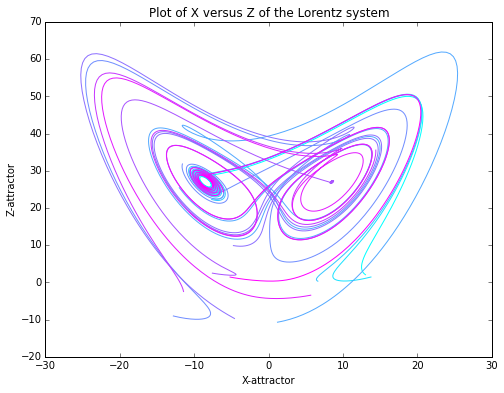

In [123]:
plot_lorentz()

In [120]:
assert True # leave this to grade the plot_lorenz function

Use `interact` to explore your `plot_lorenz` function with:

* `max_time` an integer slider over the interval $[1,10]$.
* `N` an integer slider over the interval $[1,50]$.
* `sigma` a float slider over the interval $[0.0,50.0]$.
* `rho` a float slider over the interval $[0.0,50.0]$.
* `beta` fixed at a value of $8/3$.

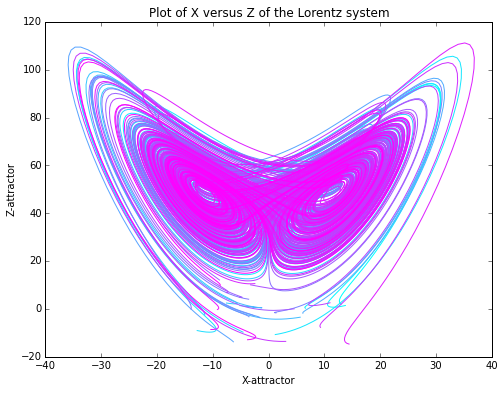

In [130]:
interact(plot_lorentz, max_time=(1,10,1), N=(1,50,1), sigma=(0, 50, 0.01), rho=(0, 50, 0.01), beta=fixed(8/3))

Describe the different behaviors you observe as you vary the parameters $\sigma$, $\rho$ and $\beta$ of the system:

Sigma seems to change the width and localization of the attractors in the system. Rho seems to adjust both the central density and the rate of time evolution of hte central dynamics. Beta is fixed and is therefore not tested. 